In [27]:
# LOAD REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print('hello2')

hello2


In [28]:
# LOAD DATASET
dataset = pd.read_csv("./bodyfat2.csv")

In [29]:
# PRINT HEAD OF DATASET
print(dataset.head())

   BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


In [32]:
# Compute the correlation matrix
corr_matrix = dataset.corr()

# Find the columns with low correlation to the target variable
low_corr_cols = list(corr_matrix[corr_matrix['BodyFat'] < 0.3].index)

# Print the correlation matrix
print(low_corr_cols)

['Age', 'Height', 'Ankle']


<AxesSubplot:>

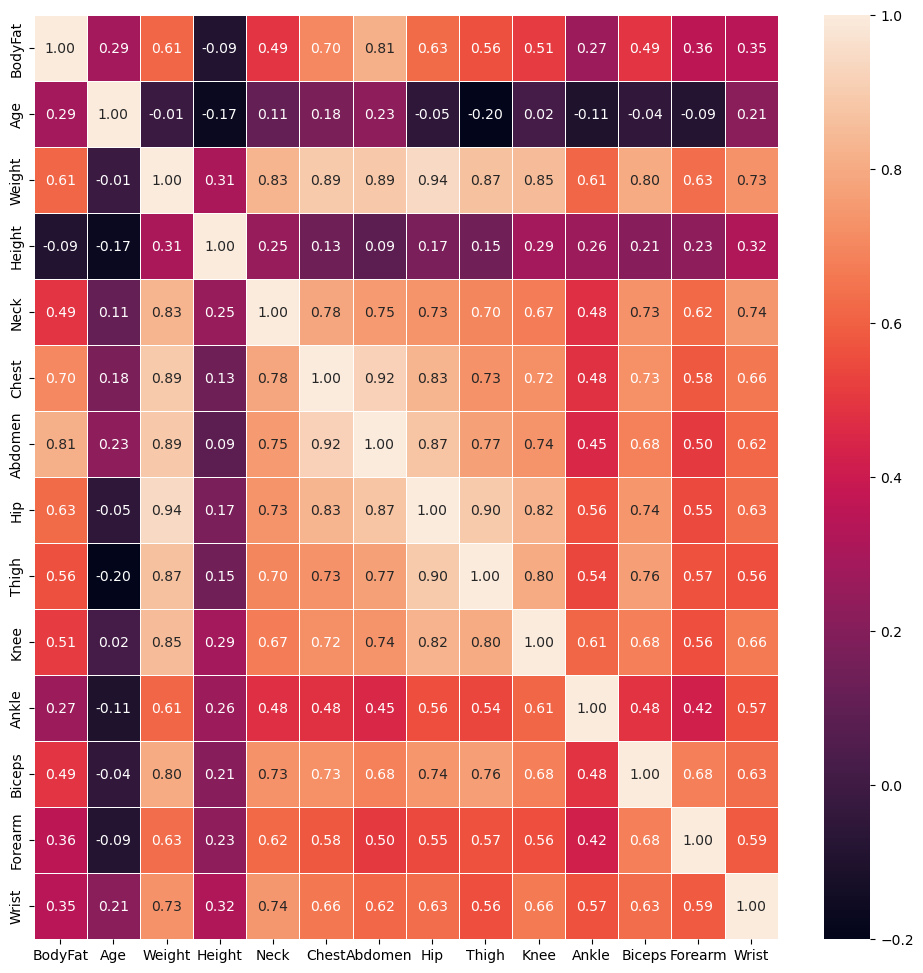

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True,linewidth=0.5,fmt="0.2f")

In [4]:
# SPLITING THE DATASET INTO TRAINING AND TESTING DATA
X = dataset.drop('BodyFat', axis=1)
y = dataset['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
import joblib

# SCALLING THE DATA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')

# Load the scaler object
scaler = joblib.load('scaler.pkl')

In [6]:
import pickle

# Generate the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the models
model.fit(X_train, y_train, epochs=1500, batch_size=24)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print('Test mean absolute error:', mae)

# Save the model
model.save('body_fat_prediction_model.h5')

# Save the model in pickle format
with open('body_fat_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Epoch 1/1500
9/9 [==============================] - 1s 5ms/step - loss: 432.4196 - mae: 18.9216
Epoch 2/1500
9/9 [==============================] - 0s 4ms/step - loss: 408.8099 - mae: 18.3517
Epoch 3/1500
9/9 [==============================] - 0s 3ms/step - loss: 378.5674 - mae: 17.5582
Epoch 4/1500
9/9 [==============================] - 0s 2ms/step - loss: 337.2175 - mae: 16.4283
Epoch 5/1500
9/9 [==============================] - 0s 2ms/step - loss: 283.5566 - mae: 14.8778
Epoch 6/1500
9/9 [==============================] - 0s 4ms/step - loss: 218.9664 - mae: 12.7745
Epoch 7/1500
9/9 [==============================] - 0s 3ms/step - loss: 159.8884 - mae: 10.6048
Epoch 8/1500
9/9 [==============================] - 0s 2ms/step - loss: 124.5250 - mae: 9.2038
Epoch 9/1500
9/9 [==============================] - 0s 3ms/step - loss: 116.1082 - mae: 8.9211
Epoch 10/1500
9/9 [==============================] - 0s 3ms/step - loss: 106.8500 - mae: 8.5697
Epoch 11/1500
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 6.8944 - mae: 2.1373
Epoch 174/1500
9/9 [==============================] - 0s 2ms/step - loss: 6.7087 - mae: 2.1381
Epoch 175/1500
9/9 [==============================] - 0s 2ms/step - loss: 6.5952 - mae: 2.1081
Epoch 176/1500
9/9 [==============================] - 0s 4ms/step - loss: 6.5009 - mae: 2.0792
Epoch 177/1500
9/9 [==============================] - 0s 2ms/step - loss: 6.4807 - mae: 2.0722
Epoch 178/1500
9/9 [==============================] - 0s 2ms/step - loss: 6.9534 - mae: 2.1398
Epoch 179/1500
9/9 [==============================] - 0s 2ms/step - loss: 6.5901 - mae: 2.0777
Epoch 180/1500
9/9 [==============================] - 0s 2ms/step - loss: 6.4254 - mae: 2.0597
Epoch 181/1500
9/9 [==============================] - 0s 2ms/step - loss: 6.4417 - mae: 2.0532
Epoch 182/1500
9/9 [==============================] - 0s 2ms/step - loss: 6.3563 - mae: 2.0550
Epoch 183/1500
9/9 [==============================] - 0s 2ms/step

9/9 [==============================] - 0s 2ms/step - loss: 1.1260 - mae: 0.7577
Epoch 346/1500
9/9 [==============================] - 0s 2ms/step - loss: 1.0959 - mae: 0.7493
Epoch 347/1500
9/9 [==============================] - 0s 2ms/step - loss: 1.0779 - mae: 0.7335
Epoch 348/1500
9/9 [==============================] - 0s 2ms/step - loss: 1.0853 - mae: 0.7390
Epoch 349/1500
9/9 [==============================] - 0s 2ms/step - loss: 1.0500 - mae: 0.7206
Epoch 350/1500
9/9 [==============================] - 0s 2ms/step - loss: 1.2068 - mae: 0.8193
Epoch 351/1500
9/9 [==============================] - 0s 4ms/step - loss: 1.1874 - mae: 0.8135
Epoch 352/1500
9/9 [==============================] - 0s 4ms/step - loss: 1.1342 - mae: 0.7698
Epoch 353/1500
9/9 [==============================] - 0s 2ms/step - loss: 1.1165 - mae: 0.7363
Epoch 354/1500
9/9 [==============================] - 0s 2ms/step - loss: 1.0543 - mae: 0.7182
Epoch 355/1500
9/9 [==============================] - 0s 2ms/step

9/9 [==============================] - 0s 2ms/step - loss: 0.2185 - mae: 0.3301
Epoch 518/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.2330 - mae: 0.3328
Epoch 519/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1982 - mae: 0.3007
Epoch 520/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1726 - mae: 0.2819
Epoch 521/1500
9/9 [==============================] - 0s 0s/step - loss: 0.1943 - mae: 0.3172
Epoch 522/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1858 - mae: 0.3083
Epoch 523/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1578 - mae: 0.2660
Epoch 524/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1605 - mae: 0.2683
Epoch 525/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.2216 - mae: 0.3317
Epoch 526/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.2269 - mae: 0.3412
Epoch 527/1500
9/9 [==============================] - 0s 2ms/step 

9/9 [==============================] - 0s 3ms/step - loss: 0.0404 - mae: 0.1370
Epoch 690/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1047 - mae: 0.2158
Epoch 691/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0732 - mae: 0.2019
Epoch 692/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.1777
Epoch 693/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0539 - mae: 0.1706
Epoch 694/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0523 - mae: 0.1665
Epoch 695/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0380 - mae: 0.1389
Epoch 696/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0328 - mae: 0.1281
Epoch 697/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0230 - mae: 0.1053
Epoch 698/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0252 - mae: 0.1061
Epoch 699/1500
9/9 [==============================] - 0s 2ms/step

9/9 [==============================] - 0s 4ms/step - loss: 0.0249 - mae: 0.1023
Epoch 862/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0179 - mae: 0.0979
Epoch 863/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0215 - mae: 0.1028
Epoch 864/1500
9/9 [==============================] - 0s 1ms/step - loss: 0.0235 - mae: 0.1131
Epoch 865/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.1108
Epoch 866/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.0373 - mae: 0.1408
Epoch 867/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0914 - mae: 0.2020
Epoch 868/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1505 - mae: 0.2629
Epoch 869/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1673 - mae: 0.3078
Epoch 870/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.4210 - mae: 0.4881
Epoch 871/1500
9/9 [==============================] - 0s 2ms/step

9/9 [==============================] - 0s 3ms/step - loss: 0.1436 - mae: 0.2265
Epoch 1034/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1788 - mae: 0.2753
Epoch 1035/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1508 - mae: 0.2659
Epoch 1036/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1849 - mae: 0.2674
Epoch 1037/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.6159 - mae: 0.4958
Epoch 1038/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.4923 - mae: 0.5350
Epoch 1039/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.7869 - mae: 0.6909
Epoch 1040/1500
9/9 [==============================] - 0s 4ms/step - loss: 0.8197 - mae: 0.6341
Epoch 1041/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.3899 - mae: 0.4987
Epoch 1042/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.4329 - mae: 0.4827
Epoch 1043/1500
9/9 [==============================] - 0

9/9 [==============================] - 0s 3ms/step - loss: 0.1923 - mae: 0.3326
Epoch 1204/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.2322 - mae: 0.3146
Epoch 1205/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.4601 - mae: 0.3639
Epoch 1206/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.2466 - mae: 0.3688
Epoch 1207/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.1680 - mae: 0.2829
Epoch 1208/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0840 - mae: 0.2171
Epoch 1209/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0418 - mae: 0.1626
Epoch 1210/1500
9/9 [==============================] - 0s 2ms/step - loss: 0.0451 - mae: 0.1624
Epoch 1211/1500
9/9 [==============================] - 0s 3ms/step - loss: 0.0312 - mae: 0.1326
Epoch 1212/1500
9/9 [==============================] - 0s 3ms/step - loss: 0.0195 - mae: 0.1110
Epoch 1213/1500
9/9 [==============================] - 0

9/9 [==============================] - 0s 2ms/step - loss: 0.2082 - mae: 0.3135
Epoch 1374/1500
9/9 [==============================] - 0s 3ms/step - loss: 0.1586 - mae: 0.2919
Epoch 1375/1500
9/9 [==============================] - 0s 3ms/step - loss: 0.2633 - mae: 0.3459
Epoch 1376/1500
9/9 [==============================] - 0s 3ms/step - loss: 0.6721 - mae: 0.6263
Epoch 1377/1500
9/9 [==============================] - 0s 3ms/step - loss: 2.4594 - mae: 0.8139
Epoch 1378/1500
9/9 [==============================] - 0s 3ms/step - loss: 1.7007 - mae: 0.9869
Epoch 1379/1500
9/9 [==============================] - 0s 3ms/step - loss: 3.0692 - mae: 1.2992
Epoch 1380/1500
9/9 [==============================] - 0s 4ms/step - loss: 2.6410 - mae: 1.2397
Epoch 1381/1500
9/9 [==============================] - 0s 4ms/step - loss: 2.9036 - mae: 1.3097
Epoch 1382/1500
9/9 [==============================] - 0s 2ms/step - loss: 1.1408 - mae: 0.7911
Epoch 1383/1500
9/9 [==============================] - 0

In [7]:
# Load the saved model
loaded_model = tf.keras.models.load_model('body_fat_prediction_model.h5')

# Define a new set of input features
new_data = [[39,125.25,68,31.5,85.1,76,88.2,50,34.7,21,26.1,23.1,16.1]]

# Scale the input features using the same StandardScaler object used during training
new_data_scaled = scaler.transform(new_data)

# Use the trained model to predict the body fat percentage for the new input features
prediction = loaded_model.predict(new_data_scaled)

print('Predicted body fat percentage:', round(prediction[0][0]))

C:\Users\Shehan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 175ms/step
Predicted body fat percentage: 8


In [8]:
import pickle

# Load the model from the pickle file
with open('body_fat_prediction_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Use the loaded model to make predictions on new data
new_data = [[42,193.5,70.5,40.7,104.9,94.1,102.7,60.6,38.6,24.7,34,30.1,18.7]]
scaled_data = scaler.transform(new_data)
prediction = model.predict(scaled_data)
print('Predicted body fat percentage:', round(prediction[0][0]))


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-10 15:05:54         2241
metadata.json                                  2023-03-10 15:05:54           64
variables.h5                                   2023-03-10 15:05:54        68224
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
1/1 [==============================] - 0s 94

C:\Users\Shehan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Load the saved model
model = tf.keras.models.load_model('body_fat_prediction_model.h5')

# Load the dataset
dataset = pd.read_csv('bodyfat2.csv')

# Split the dataset into input (X) and output (y) variables
X = dataset.drop('BodyFat', axis=1)
y = dataset['BodyFat']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a sample input data point
sample_input = np.array([37,241.25,71.5,42.1,119.2,110.3,113.9,69.8,42.6,24.8,34.4,29.5,18.4])

# Reshape the input data to match the expected shape for the model (1, 7)
sample_input = sample_input.reshape(1, -1)

# Scale the input data using the same scaler object used to scale the training data
scaled_input = scaler.transform(sample_input)

# Use the trained model to make a prediction on the scaled input
predicted_body_fat = model.predict(scaled_input)

# Rescale the predicted body fat percentage back to its original scale
# predicted_body_fat = predicted_body_fat * (dataset['BodyFat'].max() - dataset['BodyFat'].min()) + dataset['BodyFat'].min()

print('Predicted body fat percentage:', predicted_body_fat[0][0])


1/1 [==============================] - 0s 125ms/step
Predicted body fat percentage: 29.955393


C:\Users\Shehan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
